In [ ]:
# LOAD the data
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!time pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 30.6 MB/s eta 0:00:00

real	0m9.720s
user	0m6.913s
sys	0m0.985s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:
############################################Sexual data
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/
!ls '/content/drive/MyDrive/PhD/PTS_datasets/'
import pandas as pd
sxl= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl['S_Hit'] = sxl['S_Hit'].replace(np.nan, "No")
sxl = sxl.iloc[: , 1:]
print(sxl['S_Hit'].value_counts())
sxl

/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_GBM_HPT5005_FeatureImpFinal.

,Smiles,S_Hit
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes
...,...,...
9886,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1,No
9887,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21,No
9888,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2,No
9889,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1,No


# MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint

In [ ]:
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()

0    8975
1     916
Name: Target, dtype: int64

In [ ]:
dchm= sxl["Smiles"]
dchm

0       NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12
1                Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1
2                        COc1c(C)cnc(CN(C)C2CCCCC2)c1C
3                Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1
4                   CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C
                             ...                      
9886          Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1
9887              COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21
9888               CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2
9889              CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1
9890                Cc1cnn(CC2CCCN2Cc2nc3ccccc3nc2C)c1
Name: Smiles, Length: 9891, dtype: object

In [ ]:
mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(mols)
maccs

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
9887,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
9888,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
9889,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

In [ ]:
######################################################################Random_forest (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(Xt_train, Yt_train)

# predict
rfc_predict = rfc.predict(Xt_test)# check performance


In [ ]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

%cd /content/
# save the model to disk
filename = 'sexualsRandomForest_UMACCS_model.sav'
joblib.dump(rfc, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xt_test, Yt_test)
print(result)

In [ ]:
!cp sexualsRandomForest_UMACCS_model.sav /content/drive/MyDrive/PhD/RF_MACCS

In [ ]:
###Import model
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/RF_MACCS
!ls '/content/drive/MyDrive/PhD/RF_MACCS'

/content/drive/MyDrive/PhD/RF_MACCS
sexualsRandomForest_UMACCS_model.sav


In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk
loaded_model = joblib.load('/content/drive/MyDrive/PhD/RF_MACCS/sexualsRandomForest_UMACCS_model.sav')
result = loaded_model.score(Xt_test, Yt_test)
print(result)

0.9737241030823648


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rfc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rfc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rfc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rfc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rfc_predict)
cm

Accuracy: 0.973724
Recall 0.743455
precision 0.979310
F1 score: 0.845238


array([[1785,    3],
       [  49,  142]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rfc_predict))
print('Accuracy score:',accuracy_score(Yt_test, rfc_predict))
print('F1 score:',f1_score(Yt_test, rfc_predict))

ROCAUC score: 0.8708888225166027
Accuracy score: 0.9737241030823648
F1 score: 0.8452380952380952


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rfc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rfc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rfc_predict)
print(matrix)

Cohens kappa: 0.831175
ROC AUC: 0.870889
[[1785    3]
 [  49  142]]


In [ ]:
print('ROCAUC score:',roc_auc_score(Yt_test, rfc_predict))
print('Accuracy score:',accuracy_score(Yt_test, rfc_predict))
print('F1 score:',f1_score(Yt_test, rfc_predict))

ROCAUC score: 0.8708888225166027
Accuracy score: 0.9737241030823648
F1 score: 0.8452380952380952


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 1979
0    1788
1     191
Name: Target, dtype: int64
[[1785    3]
 [  49  142]]


In [ ]:
##################################################Cross validation kfold=10
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
fit=rfc.fit(Xt_train, Yt_train)

# predict
rfc_predict = rfc.predict(Xt_test)# check performance


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,Xt_train, Yt_train, cv=10)

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.00


# Hyperparameter Tuning

---

Random Forest Hyperparameters we’ll be Looking at:

*   max_depth
*   min_sample_split
*   max_leaf_nodes
*   min_samples_leaf
*   n_estimators
*   max_sample (bootstrap sample)
*   max_features
---
https://analyticsindiamag.com/guide-to-hyperparameters-tuning-using-gridsearchcv-and-randomizedsearchcv/
https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/
https://www.analyticsvidhya.com/blog/2021/03/introduction-to-random-forest-and-its-hyper-parameters/
https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html


In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

In [ ]:
forest_params = [{'max_depth': list(range(10, 15)), 
                  'max_features': ['auto', 'log2'], #'max_features': list(range(0,14))
                  'bootstrap': [True],
                  'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],
                  }]

rfc = RandomForestClassifier()

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(Xt_train, Yt_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True],
                          'max_depth': [10, 11, 12, 13, 14],
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}],
             scoring='accuracy')

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': True, 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 10}
0.9720677061385026


In [ ]:
#Load model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap= True, max_depth= 14,max_features= 'auto', n_estimators= 10,random_state=0)

# fit the predictor and target
fit=rfc.fit(Xt_train, Yt_train)

# predict
rf_predict = rfc.predict(Xt_test)# check performance
#/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rf_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rf_predict))
print('Accuracy score:',accuracy_score(Yt_test, rf_predict))
print('F1 score:',f1_score(Yt_test, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rf_predict)
print(matrix)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,Xt_train, Yt_train, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print(scores.mean())
print(scores.std())

Accuracy: 0.969176
Recall 0.706806
precision 0.964286
F1 score: 0.815710
ROCAUC score: 0.8520049310704289
Accuracy score: 0.9691763516927742
F1 score: 0.8157099697885197
Cohens kappa: 0.799326
ROC AUC: 0.852005
[[1783    5]
 [  56  135]]


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

0.97 accuracy with a standard deviation of 0.00
0.9691611117496073
0.0031541942416384167


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
import joblib

%cd /content/
# save the model to disk
filename = 'sexualsRF_HPTFinal_UMACCS_model.pkl'
joblib.dump(rfc, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xt_test, Yt_test)
print(result)

/content
0.9691763516927742


In [ ]:
!cp 'sexualsRF_HPTFinal_UMACCS_model.pkl' /content/drive/MyDrive/PhD/RF_MACCS

In [ ]:
# predict
clf_predict = clf.predict(Xt_test)# check performance

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,Xt_train, Yt_train, cv=10)

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.00


In [ ]:
print(scores.mean())
print(scores.std())

0.970172170504029
0.002473447724899322


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,clf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,clf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,clf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,clf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,clf_predict)
cm

Accuracy: 0.966145
Recall 0.680628
precision 0.955882
F1 score: 0.795107


array([[1782,    6],
       [  61,  130]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, clf_predict))
print('Accuracy score:',accuracy_score(Yt_test, clf_predict))
print('F1 score:',f1_score(Yt_test, clf_predict))

ROCAUC score: 0.8386362837766612
Accuracy score: 0.966144517433047
F1 score: 0.7951070336391438


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, clf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, clf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, clf_predict)
print(matrix)

Cohens kappa: 0.777222
ROC AUC: 0.838636
[[1782    6]
 [  61  130]]


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 1979
0    1788
1     191
Name: Target, dtype: int64
[[1782    6]
 [  61  130]]


In [ ]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

%cd /content/
# save the model to disk
filename = 'sexualsRandomForestFinalizedhpt_UMACCS_model.sav'
joblib.dump(clf, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xt_test, Yt_test)
print(result)

/content
0.966144517433047


In [ ]:
!cp sexualsRandomForestFinalizedhpt_UMACCS_model.sav /content/drive/MyDrive/PhD/RF_MACCS

In [ ]:
###Import model
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/RF_MACCS
!ls '/content/drive/MyDrive/PhD/RF_MACCS'

/content/drive/MyDrive/PhD/RF_MACCS
sexualsRandomForestFinalizedhpt_UMACCS_model.sav
sexualsRandomForest_UMACCS_model.sav


In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk
loaded_model = joblib.load('/content/drive/MyDrive/PhD/RF_MACCS/sexualsRandomForestFinalizedhpt_UMACCS_model.sav')
result = loaded_model.score(Xt_test, Yt_test)
print(result)

0.966144517433047


# Feature Importance extraction

---
Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.


https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

---



In [ ]:
#Load model

from sklearn.ensemble import RandomForestClassifier
load_model = RandomForestClassifier(bootstrap= True, max_depth= 14,max_features= 'auto', n_estimators= 10,random_state=0)
load_model.fit(Xt_train, Yt_train)

RandomForestClassifier(max_depth=14, n_estimators=10, random_state=0)

In [ ]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

%cd /content/
# save the model to disk
filename = 'sexualsRandomForestFinalizedhpt2_UMACCS_model.sav'
joblib.dump(load_model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xt_test, Yt_test)
print(result)

/content
0.9691763516927742


In [ ]:
!cp sexualsRandomForestFinalizedhpt2_UMACCS_model.sav /content/drive/MyDrive/PhD/RF_MACCS

In [ ]:
###Import model
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/RF_MACCS
!ls '/content/drive/MyDrive/PhD/RF_MACCS'

/content/drive/MyDrive/PhD/RF_MACCS
sexualsRandomForestFinalizedhpt2_UMACCS_model.sav
sexualsRandomForestFinalizedhpt_UMACCS_model.sav
sexualsRandomForest_UMACCS_model.sav


In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk
loaded_model = joblib.load('/content/drive/MyDrive/PhD/RF_MACCS/sexualsRandomForestFinalizedhpt2_UMACCS_model.sav')
result = loaded_model.score(Xt_test, Yt_test)
print(result)

0.9691763516927742


In [ ]:
#Replace numbers with chemical info

In [ ]:
#Feature importance
feature_names = [f"feature {i}" for i in range(Xt_train.shape[1])]

In [ ]:
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12',
 'feature 13',
 'feature 14',
 'feature 15',
 'feature 16',
 'feature 17',
 'feature 18',
 'feature 19',
 'feature 20',
 'feature 21',
 'feature 22',
 'feature 23',
 'feature 24',
 'feature 25',
 'feature 26',
 'feature 27',
 'feature 28',
 'feature 29',
 'feature 30',
 'feature 31',
 'feature 32',
 'feature 33',
 'feature 34',
 'feature 35',
 'feature 36',
 'feature 37',
 'feature 38',
 'feature 39',
 'feature 40',
 'feature 41',
 'feature 42',
 'feature 43',
 'feature 44',
 'feature 45',
 'feature 46',
 'feature 47',
 'feature 48',
 'feature 49',
 'feature 50',
 'feature 51',
 'feature 52',
 'feature 53',
 'feature 54',
 'feature 55',
 'feature 56',
 'feature 57',
 'feature 58',
 'feature 59',
 'feature 60',
 'feature 61',
 'feature 62',
 'feature 63',
 'feature 64',
 'feature 65',
 'feature 66',
 'fea

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = load_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in load_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.017 seconds


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

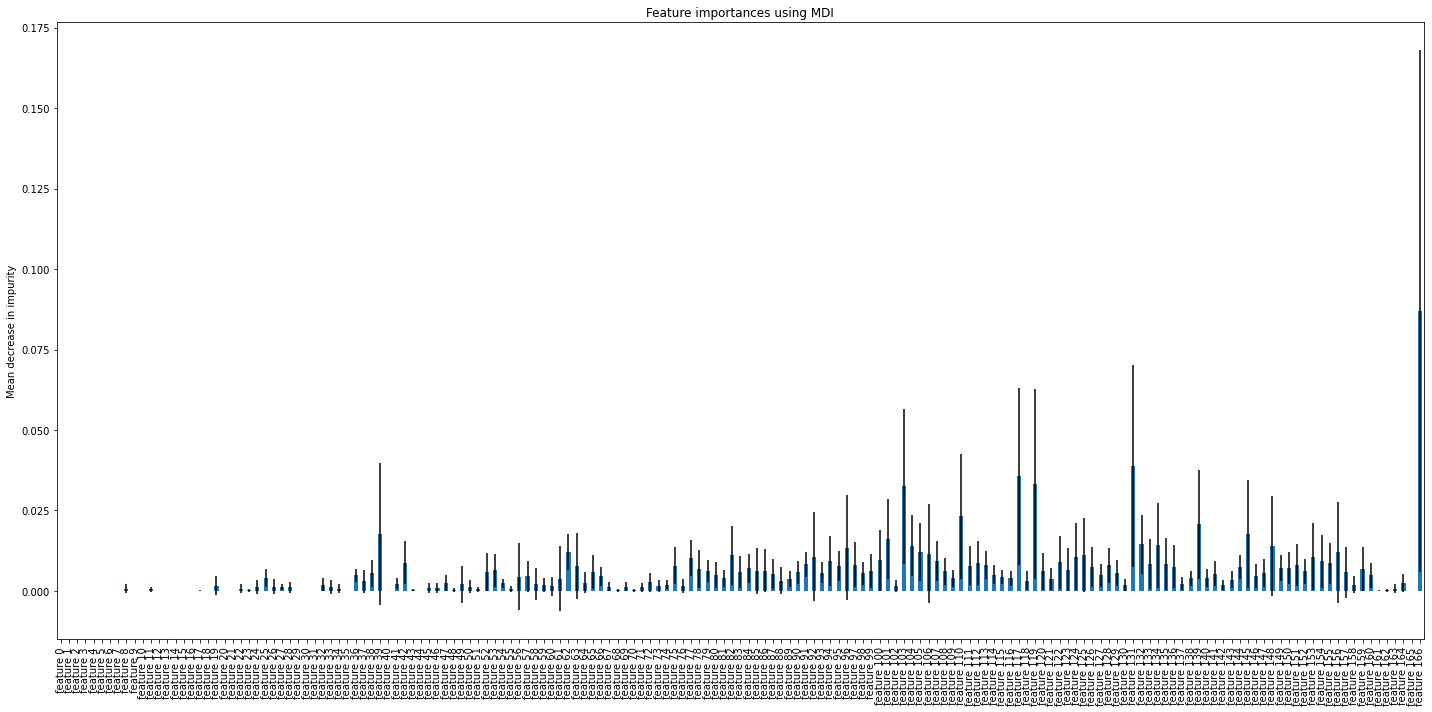

In [ ]:
import pandas as pd

model_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    load_model, Xt_test, Yt_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

model_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 18.307 seconds


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

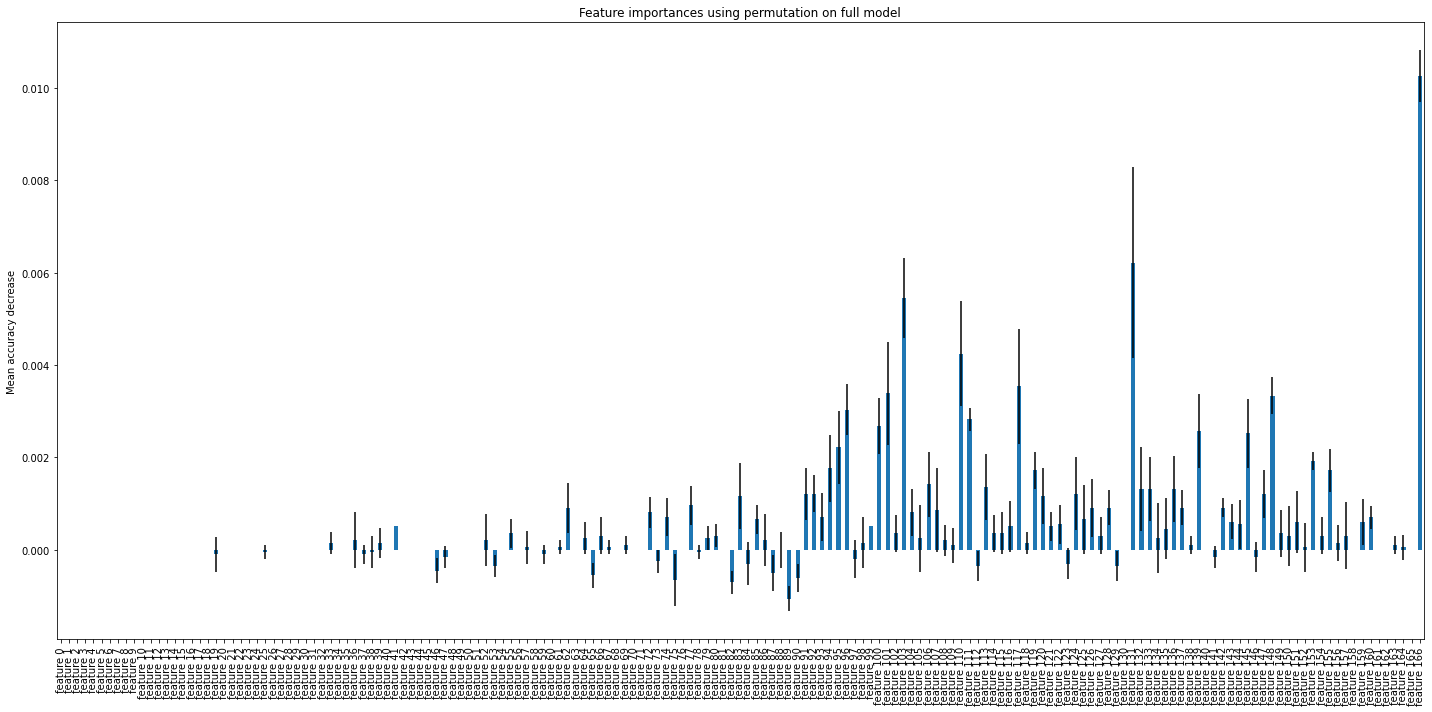

In [ ]:
fig, ax = plt.subplots()
model_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
importances= pd.DataFrame(model_importances)
importances2= importances.set_axis(['Permutation'], axis=1, inplace=False)
importances2

,Permutation
feature 0,0.000000
feature 1,0.000000
feature 2,0.000000
feature 3,0.000000
feature 4,0.000000
...,...
feature 162,0.000000
feature 163,0.000101
feature 164,0.000051
feature 165,0.000000


In [ ]:
importances2.sort_values("Permutation").head(10)

,Permutation
feature 89,-0.001061
feature 82,-0.000707
feature 75,-0.000657
feature 90,-0.000606
feature 65,-0.000556
feature 87,-0.000505
feature 46,-0.000455
feature 129,-0.000354
feature 112,-0.000354
feature 53,-0.000354


In [ ]:
importances2.nlargest(50, 'Permutation')

,Permutation
feature 166,0.010258
feature 131,0.006215
feature 103,0.005457
feature 110,0.004245
feature 117,0.003537
feature 101,0.003386
feature 148,0.003335
feature 96,0.003032
feature 111,0.002830
feature 100,0.002678


In [ ]:
##
from google.colab import files
f_imp= importances2.nlargest(166, 'Permutation')
f_imp.to_csv('sxl_UnderMACCS_RF_HPT_FeatureImp.csv', encoding = 'utf-8-sig') 
files.download('sxl_UnderMACCS_RF_HPT_FeatureImp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp 'sxl_UnderMACCS_RF_HPT_FeatureImp.csv' /content/drive/MyDrive/PhD/RF_MACCS

cp: 'sxl_UnderMACCS_RF_HPT_FeatureImp.csv' and '/content/drive/MyDrive/PhD/RF_MACCS/sxl_UnderMACCS_RF_HPT_FeatureImp.csv' are the same file
